# Using real-world oceanographic data in Python

## Notebook adapted from: OOI Irminger Discrete Water Samples
_link: https://github.com/WHOIGit/ooi-on-bco-dmo/blob/main/notebooks/0-OOI-Irminger-discrete-sample-article-figures.ipynb_

### Goal of this notebook: Quickly plot OOI's Water Sampling data from an Array over time for several parameters

The NSF Ocean Observatories Initiative (OOI) provides [Discrete CTD and Water Sampling Cruise Data](https://www.bco-dmo.org/project/905736) for each Array as a dataset in the Biological and Chemical Oceanography Data Management Office (BCO-DMO). This notebook plots Oxygen, Salinity, and Nitrate data from the Global Irminger Sea Array from 2014-2023 [doi:10.26008/1912/bco-dmo.911407.1](https://www.bco-dmo.org/dataset/911407)


### Set Up
The GitHub repository containing this notebook includes information about dependencies (and versions) in .yml files.

In [1]:
# Import modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import cmocean.cm as cmo # colormaps for commonly-used oceanographic variables

### What error are you getting? What might this mean we need to do?

In [2]:
# print(mpl.__version__) # if plot cell results in error check version of matplotlib

### Load OOI data into workspace
To access the data in comma separated variable (CSV) format, one can either:
1. Access the File through the URL at ERDDAP > Files (shown below) 
2. Generate a URL using the [ERDDAP Data Access Form](https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_911407_v1.html)
      - If using the ERDDAP Data Access Form, file type .csvp provides a single header row. 
      - If using the ERDDAP Data Access Form, one can subset (e.g., select variables of interest) prior to loading the data.


In [3]:
# ERDDAP link to the public dataset CSV
erddap_url = "https://erddap.bco-dmo.org/erddap/files/bcodmo_dataset_911407_v1/911407_v1_ooi_irminger_sea_discrete_water_sampling_data.csv"

# Load the OOI data into a dataframe
ooi_irm = pd.read_csv(erddap_url)

# Call head() to check that the data was imported correctly
ooi_irm.head()

,Cruise,Station,Target_Asset,Start_Latitude,Start_Longitude,Start_Time,Cast,Cast_Flag,Bottom_Depth_at_Start_Position,CTD_File,...,Discrete_pH_Replicate_Flag,Calculated_Alkalinity,Calculated_DIC,Calculated_pCO2,Calculated_pH,Calculated_CO2aq,Calculated_Bicarb,Calculated_CO3,Calculated_Omega_C,Calculated_Omega_A
0,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### List available parameters
Convert relevant parameters to datetime if needed

In [4]:
print(ooi_irm.columns)

Index(['Cruise', 'Station', 'Target_Asset', 'Start_Latitude',
       'Start_Longitude', 'Start_Time', 'Cast', 'Cast_Flag',
       'Bottom_Depth_at_Start_Position', 'CTD_File', 'CTD_File_Flag',
       'Niskin_Bottle_Position', 'Niskin_Flag', 'CTD_Bottle_Closure_Time',
       'CTD_Pressure', 'CTD_Pressure_Flag', 'CTD_Depth', 'CTD_Latitude',
       'CTD_Longitude', 'CTD_Temperature_1', 'CTD_Temperature_1_Flag',
       'CTD_Temperature_2', 'CTD_Temperature_2_Flag', 'CTD_Conductivity_1',
       'CTD_Conductivity_1_Flag', 'CTD_Conductivity_2',
       'CTD_Conductivity_2_Flag', 'CTD_Salinity_1', 'CTD_Salinity_2',
       'CTD_Oxygen', 'CTD_Oxygen_Flag', 'CTD_Oxygen_Saturation',
       'CTD_Fluorescence', 'CTD_Fluorescence_Flag', 'CTD_Beam_Attenuation',
       'CTD_Beam_Transmission', 'CTD_Transmissometer_Flag', 'CTD_pH',
       'CTD_pH_Flag', 'Discrete_Oxygen', 'Discrete_Oxygen_Flag',
       'Discrete_Oxygen_Replicate_Flag', 'Discrete_Chlorophyll',
       'Discrete_Phaeopigment', 'Discrete_Fo_

In [5]:
# Convert the CTD Bottle Closure Time to a datetime data type
ooi_irm["CTD_Bottle_Closure_Time"] = pd.to_datetime(ooi_irm["CTD_Bottle_Closure_Time"], yearfirst=True, utc=True)
ooi_irm.dtypes["CTD_Bottle_Closure_Time"]

datetime64[ns, UTC]

### Apply QC flags
For functions to interpret OOI discrete sample CTD flags to QARTOD QC-flags please see bottles.py file in https://github.com/oceanobservatories/ooi-data-explorations. For your convience, the module has also been included in this repository.

In [6]:
# display unique Discrete Sample flags
# ooi_irm.Discrete_Oxygen_Flag.unique() # display unique one column
pd.unique(ooi_irm[["Discrete_Oxygen_Flag", "Discrete_Salinity_Flag", "Discrete_Nutrients_Flag"]].values.ravel('K')) # display unique multiple columns

array([nan, '*0000000000000100', '*0000000000000010', '*0000000000000101',
       '*0000000000001001'], dtype=object)

In [7]:
# Assign "Acceptable" flags to QARTOD 
flag1 = "*0000000000000100" # Good 1 in Bit Position 2 (i.e., 3rd from right)
flag2 = "*0000000000000101" # this example had 2 unique "Acceptable" flags

ooi_irm.loc[ooi_irm.Discrete_Oxygen_Flag == flag1, 'Discrete_Oxygen_Flag'] = 1       # assign QARTOD Good
ooi_irm.loc[ooi_irm.Discrete_Oxygen_Flag == flag2, 'Discrete_Oxygen_Flag'] = 1       # assign QARTOD Good
ooi_irm.loc[ooi_irm.Discrete_Salinity_Flag == flag1, 'Discrete_Salinity_Flag'] = 1   # assign QARTOD Good
ooi_irm.loc[ooi_irm.Discrete_Salinity_Flag == flag2, 'Discrete_Salinity_Flag'] = 1   # assign QARTOD Good
ooi_irm.loc[ooi_irm.Discrete_Nutrients_Flag == flag1, 'Discrete_Nutrients_Flag'] = 1 # assign QARTOD Good
ooi_irm.loc[ooi_irm.Discrete_Nutrients_Flag == flag2, 'Discrete_Nutrients_Flag'] = 1 # assign QARTOD Good

# Display unique Discrete Sample flags
pd.unique(ooi_irm[["Discrete_Oxygen_Flag", "Discrete_Salinity_Flag", "Discrete_Nutrients_Flag"]].values.ravel('K')) # display unique multiple columns


array([nan, 1, '*0000000000000010', '*0000000000001001'], dtype=object)

In [8]:
# Subset Data Frame to Discrete Samples with Acceptable flags
irm_qc = ooi_irm.query("Discrete_Oxygen_Flag==1 | Discrete_Salinity_Flag==1 | Discrete_Nutrients_Flag==1")
print(f"This subset of Discrete Samples with Acceptable flags reduced the total data points from {len(ooi_irm)} to {len(irm_qc)}")

This subset of Discrete Samples with Acceptable flags reduced the total data points from 1937 to 1174


### Plot Data

##### Set themes, styles, and figure global parameters

In [9]:
# For indexing multi-panel plots with matplotlib 
flag_oxy = irm_qc["Discrete_Oxygen_Flag"]==1
flag_sal = irm_qc["Discrete_Salinity_Flag"]==1
flag_ntr = irm_qc["Discrete_Nutrients_Flag"]==1

In [10]:
# Assign colormaps from cmocean package
cmap_oxy = cmo.deep_r
cmap_salt = cmo.haline
cmap_nitr = cmo.matter
cmap_chl = cmo.algae
cmap_time = cmo.tempo_r

In [11]:
# set up time for matplotlib plots
time = irm_qc["CTD_Bottle_Closure_Time"].values

# Create a matplotlib-friendly numeric time array
mpl_time = mpl.dates.date2num(time)

# Create normalizer for colorbar representing the full date range
normalizer = Normalize(mpl_time[0], mpl_time[-1])

# Create tick locator for using time as the color scale
locator = AutoDateLocator()

##### Plot Quality Controlled Data

**Figure 1.** Plot the oxygen, salinity, and nitrate concentrations through time as a function of depth

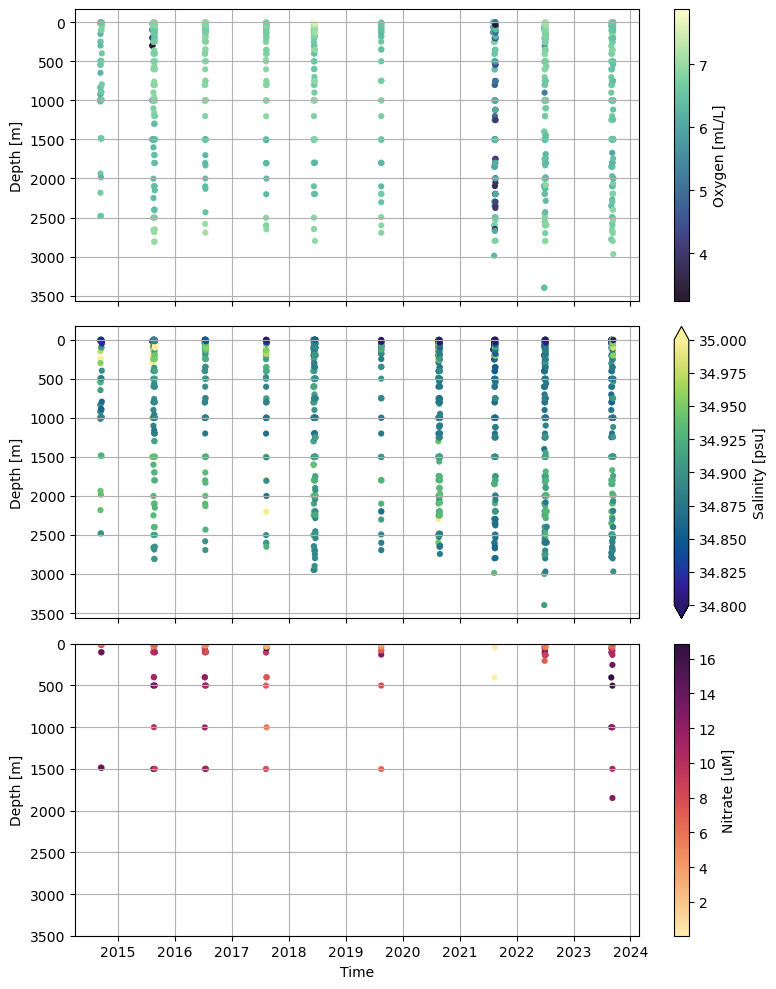

In [12]:
# Create the subplots with time on the x-axis
fig, axs = plt.subplots(3, 1, figsize=(8,10), sharex=True, layout="tight")

# Discrete Oxygen
plt.subplot(3,1,1)
axs[0].invert_yaxis()
plt.scatter(x=time[flag_oxy], y=irm_qc["CTD_Depth"][flag_oxy], s=20,
            c=irm_qc["Discrete_Oxygen"][flag_oxy], cmap=cmap_oxy,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Oxygen [mL/L]")
axs[0].set_ylabel("Depth [m]")

# Discrete Salinity
plt.subplot(3,1,2)
axs[1].invert_yaxis()
plt.scatter(x=time[flag_sal], y=irm_qc["CTD_Depth"][flag_sal], s=20,
            c=irm_qc["Discrete_Salinity"][flag_sal], cmap=cmap_salt,
            edgecolors="none", vmin=34.8, vmax=35)
plt.grid()
plt.colorbar(label="Salinity [psu]", extend='both')
axs[1].set_ylabel("Depth [m]")

# Discrete Nitrate
plt.subplot(3,1,3)
axs[2].set_ylim([0, 3500])
axs[2].invert_yaxis()
plt.scatter(x=time[flag_ntr], y=irm_qc["CTD_Depth"][flag_ntr], s=20,
            c=irm_qc["Discrete_Nitrate"][flag_ntr], cmap=cmap_nitr,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Nitrate [uM]")
axs[2].set_ylabel("Depth [m]")

axs[2].set_xlabel("Time")

fig.savefig("../figures/oxygen_salinity_nitrate.pdf")

**Figure 2.** Plot oxygen, salinity, and nitrate concentrations as a function of depth

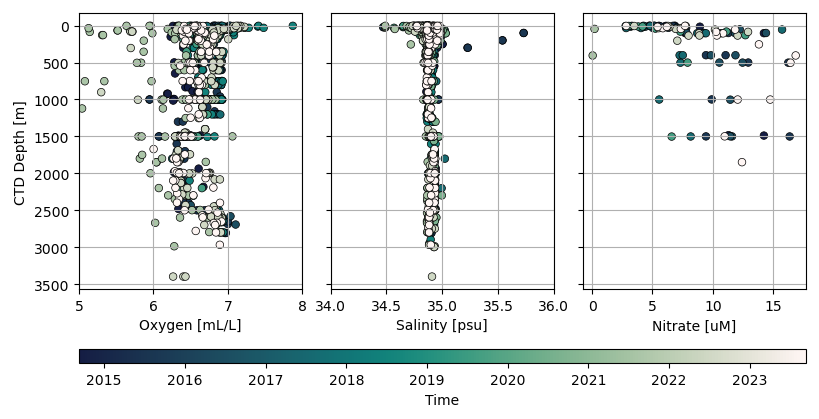

In [13]:
# Create the subplots with time indicated by color
fig, axs = plt.subplots(1, 3, figsize=(8,4), sharey=True, constrained_layout=True)
subfig = fig.subfigures(nrows=1, ncols=1)

# Discrete Oxygen
plt.subplot(1,3,1)
axs[0].invert_yaxis()
plt.scatter(x=irm_qc["Discrete_Oxygen"][flag_oxy], y=irm_qc["CTD_Depth"][flag_oxy], s=30,
            c=mpl_time[flag_oxy], cmap=cmap_time, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[0].set_ylabel("CTD Depth [m]")
axs[0].set_xlabel("Oxygen [mL/L]")
axs[0].set_xlim([5,8])

# Discrete Salinity
plt.subplot(1,3,2)
axs[1].invert_yaxis()
plt.scatter(x=irm_qc["Discrete_Salinity"][flag_sal], y=irm_qc["CTD_Depth"][flag_sal],
            c=mpl_time[flag_sal], cmap=cmap_time, s=30, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[1].set_xlabel("Salinity [psu]")
axs[1].set_xlim([34,36])

# Discrete Nitrate
plt.subplot(1,3,3)
axs[2].invert_yaxis()
plt.scatter(x=irm_qc["Discrete_Nitrate"][flag_ntr], y=irm_qc["CTD_Depth"][flag_ntr], s=30,
            c=mpl_time[flag_ntr], cmap=cmap_time, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[2].set_xlabel("Nitrate [uM]")

time_map = cm.ScalarMappable(norm=normalizer, cmap=cmap_time)
subfig.colorbar(time_map, ax=axs.ravel().tolist(), label="Time", ticks=AutoDateLocator(),
             format=AutoDateFormatter(locator), location="bottom", aspect=50)
plt.show()

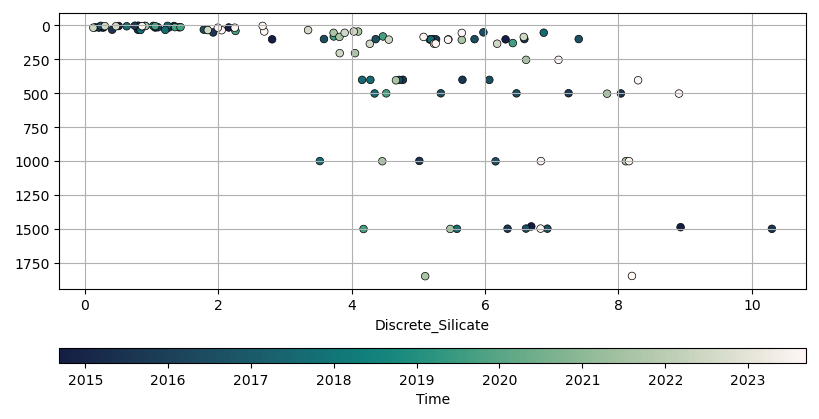

In [14]:
fig, axs = plt.subplots(1,1,figsize=(8,4), sharey=True, constrained_layout=True)
subfig = fig.subfigures(nrows=1, ncols=1)

axs.invert_yaxis()
variable="Discrete_Silicate"
axs.scatter(x=irm_qc[variable][flag_ntr], y=irm_qc["CTD_Depth"][flag_ntr], s=30,
            c=mpl_time[flag_ntr], cmap=cmap_time, norm=normalizer,
            edgecolors="k", linewidths=0.5)
axs.grid()
axs.set_xlabel(variable)

time_map = cm.ScalarMappable(norm=normalizer, cmap=cmap_time)
subfig.colorbar(time_map, ax=axs, label="Time", ticks=AutoDateLocator(),
             format=AutoDateFormatter(locator), location="bottom", aspect=50)


### Challenge questions in groups of 2 (add to the notebook)
When you have plots you're happy with, paste them after a title slide with your group members into this presentation: https://docs.google.com/presentation/d/1HREIaJXX9zHNBBvS3lNWr1W_GR2wzOJvehwwYZTFHRY/edit?usp=sharing 

1. Select one depth and plot a line plot with scatter points showing change over time for 5 distinct variables, including 3 not chosen in the 3-part plot above
2. Plot 2 variables against one another instead of against time. Do you notice any trends?
3. Plot fluorescence using a variable that makes sense from the DataFrame column index and using the "algae" colormap highlighted above. Why do you think so many data are missing?
4. Try plotting depth profiles for individual timepoints by connecting observations with depth and making the x-axis of the plot the variable we are observing. Choose your top 3 most interesting profiles for some measured nutrient or response and put them into our shared Google Slides.
5. Create a T-S plot (a scatter plot of Temperature and Salinity) for all the data in the dataset. Color the scatter plots by cruise (you might consider using the groupby method here). Include a legend for the plot. Set the range of the x and y axes to zoom in on the majority of the data (exclude outliers).
   
_Challenge question_: can you plot a regression line and calculate a correlation coefficient between 2 of the variables you plotted in question 2? Feel free to use external resources for this!